# TSNE for Posters and Talk

In [4]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs, TSNEPlot
from larval_gonad.config import memory
from larval_gonad.cell_selection import SOMA, EARLY_GERM, LATE_GERM

# Setup notebook
nbconfig = Nb.setup_notebook(subproject_dir='../output/FlyMeeting_2018_talk', seurat_dir='../output/combined_testis_force')
mpl.style.use(['common', 'talk'])

last updated: 2018-04-03 
Git hash: 6ffa85dd58c284a310b117876de44df894907c6b


In [ ]:
clusters = nbconfig.seurat.get_clusters()
tsne = nbconfig.seurat.get_tsne()
norm = nbconfig.seurat.get_normalized_read_counts()

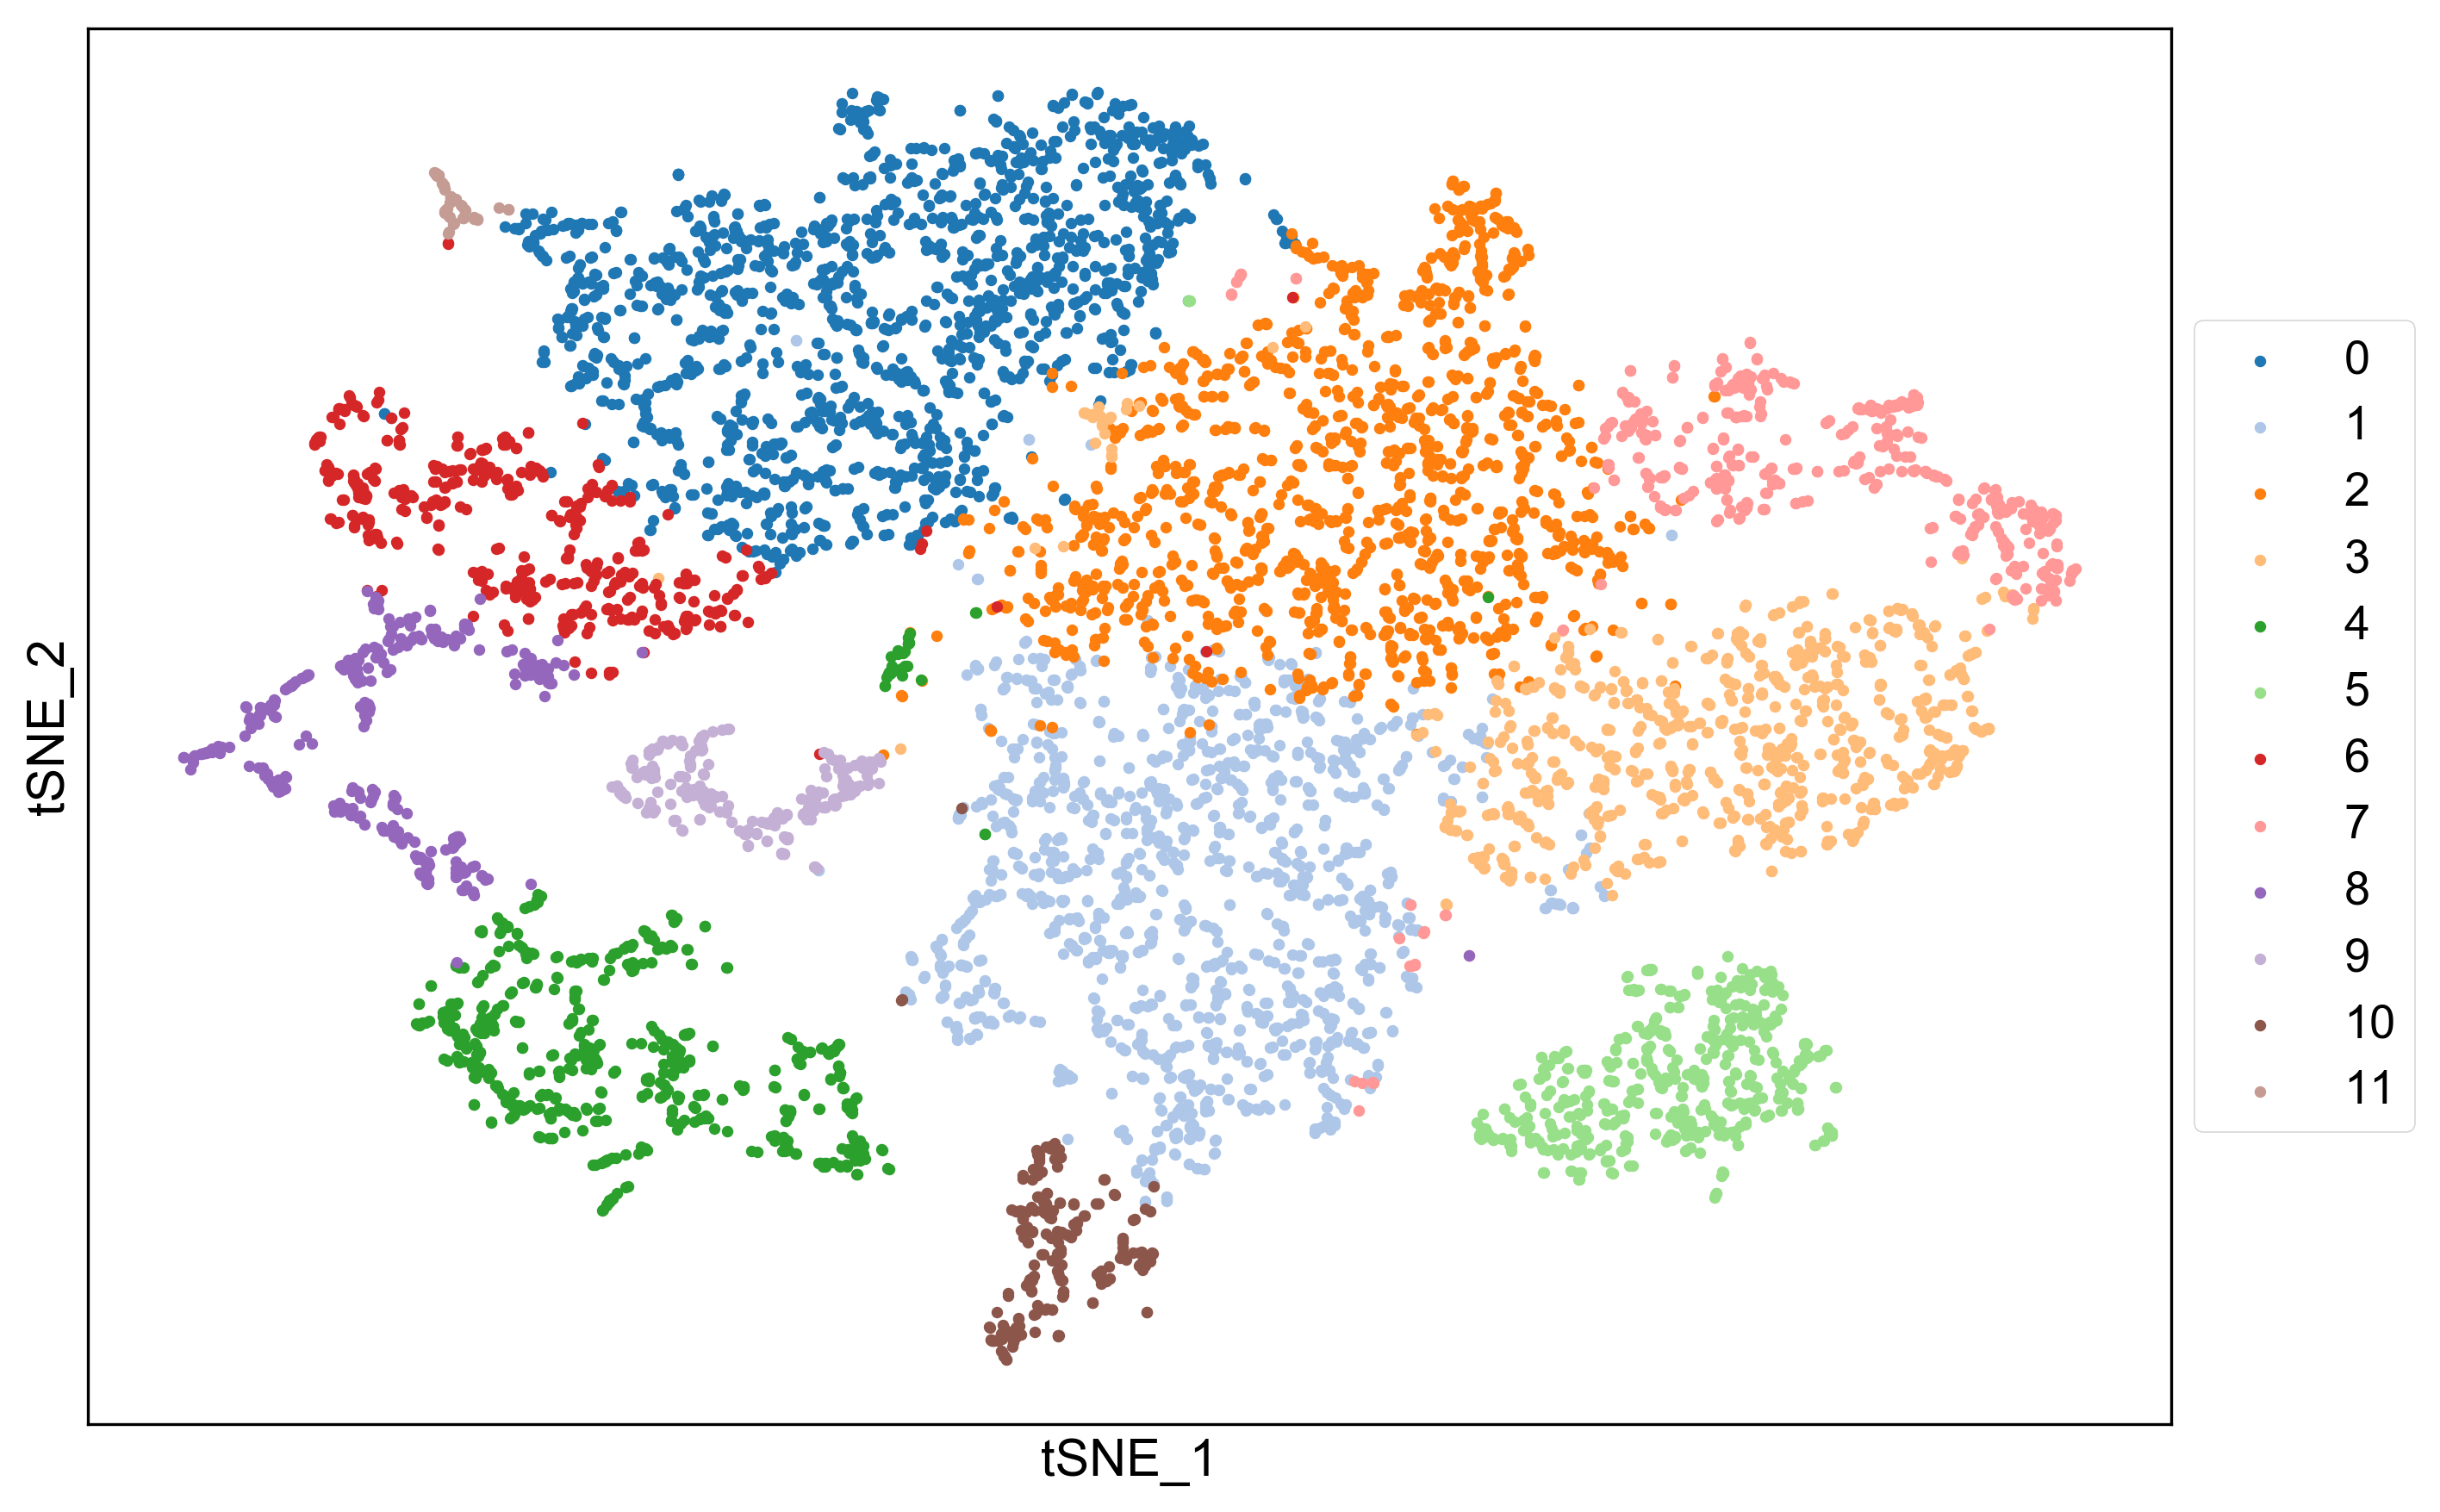

In [8]:
_colors = sns.color_palette('tab20', n_colors=12)
TSNEPlot(data=tsne.join(clusters['res.0.4']), hue='res.0.4', palette=_colors, s=8)

In [10]:
greys = sns.color_palette('Greys')
reds = sns.color_palette('Reds')
reds[0] = greys[1]
blacks = [greys[1], '#000000']

def _plot(gene, ax=None):
    fbgn = nbconfig.symbol2fbgn[gene]
    if ax is None:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(1/3))
        
    try:
        TSNEPlot(data=tsne.join(norm.T), hue=fbgn, palette=reds, ax=ax1)
        TSNEPlot(data=tsne.join(norm.T > 0), hue=fbgn, palette=blacks, ax=ax2)
    except KeyError:
        pass

    ax1.set_aspect('equal')
    ax2.set_aspect('equal')

    fig.suptitle(f'{gene} ({fbgn})', fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, .95])
    
    
def _plot2(gene, ax=None):
    fbgn = nbconfig.symbol2fbgn[gene]
    if ax is None:
        fig, ax = plt.subplots(1, 1)
    try:
        TSNEPlot(data=tsne.join(norm.T), hue=fbgn, palette=reds, ax=ax, cbar=False, s=5)
    except KeyError:
        pass

    ax.set_aspect('equal')
    ax.set_title(f'{gene} ({fbgn})')
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.tight_layout(rect=[0, 0, 1, .95])

In [11]:
brian = [
    'glob1',
    'Npc2b',
    'GstE6',
    'tj',
    'Npc2f',
    'Hesr',
    'retn',
    'Abd-B',
    'nord',
    'Rcd-1r',
    'vas',
    'SkpE',
    'Mst33A',
    'Prosbeta5R1',
    'betaTub85D',
    'vkg',
    'E5',
    'ltl',
    'pan',
    'sona', 
    'Eip93F',
]

In [ ]:
from itertools import zip_longest
fig, axes = plt.subplots(5, 5)
for (k, ax) in zip_longest(brian, axes.flatten(), fillvalue=None):
    
    if k is None:
        continue
        
    _plot2(k, ax=ax)
    
plt.tight_layout()